interactive(children=(FloatSlider(value=0.7, description='lambda_process', max=1.0), FloatSlider(value=0.0, de…

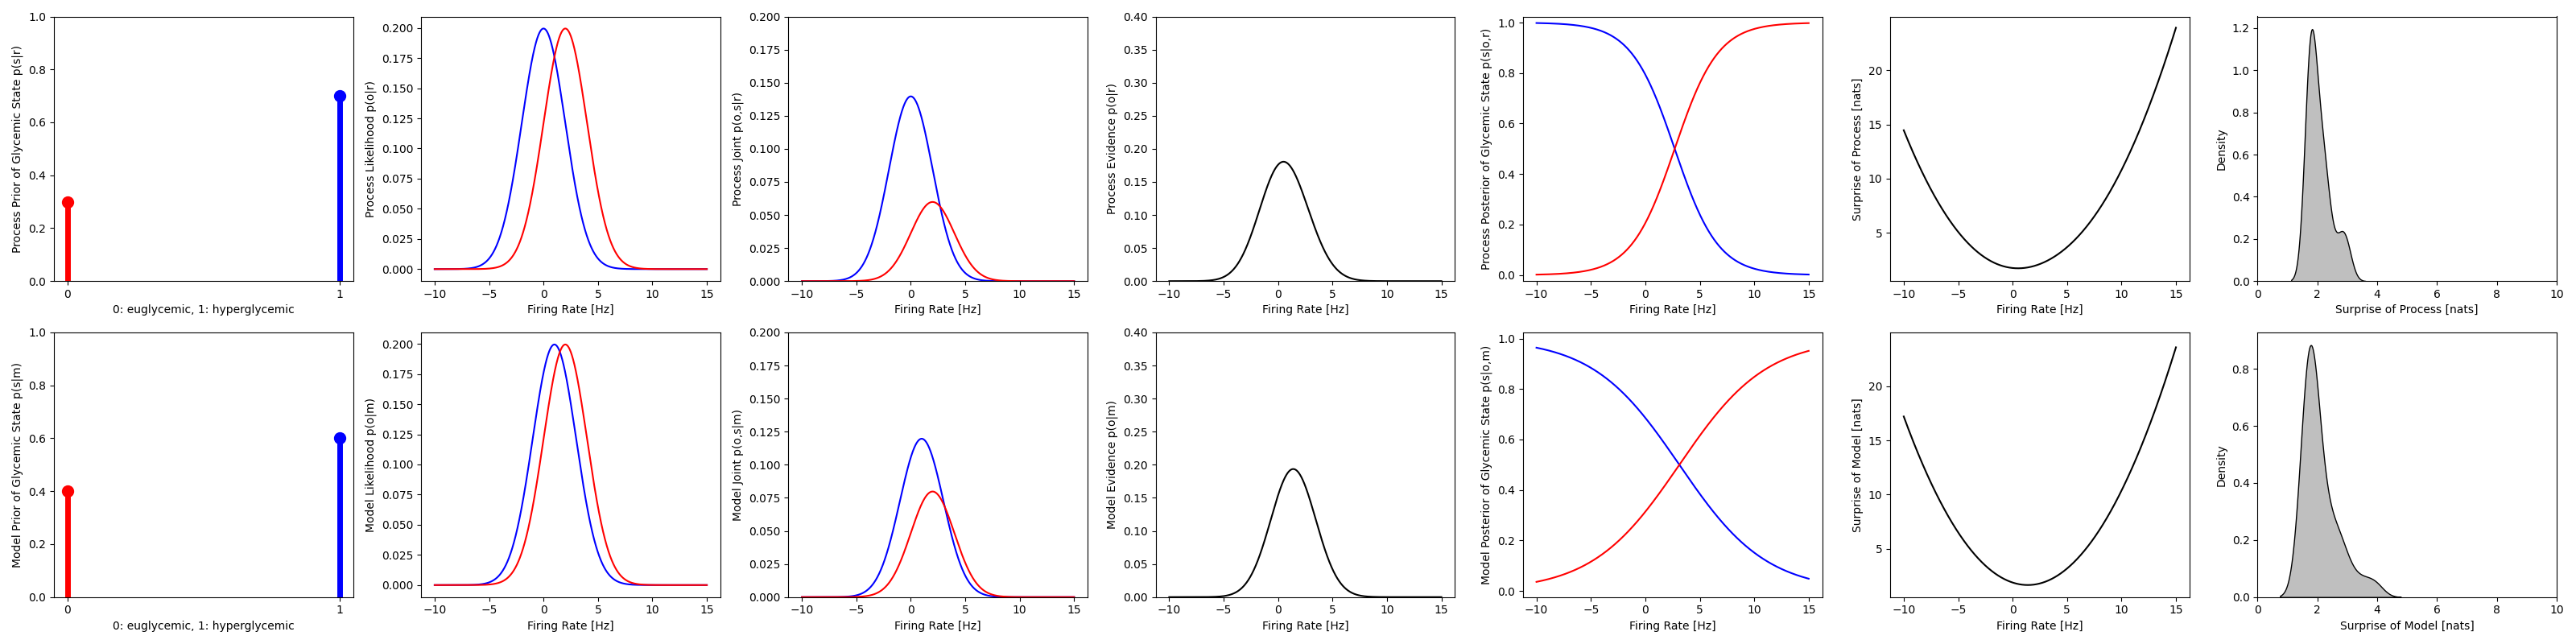

In [3]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact
import seaborn as sns

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 15, 0.001)

# define the bernoulli distribution that models the prior hidden glucose state
# this bernoulli distribution will be considered as the generative process for the hidden states
p_1_process = 0.7
p_1_model = 0.7

# sample size for simulation part
N = 30
samples_2 = []
new_sample_2 = []

####
samples_likelihood = []
samples = []

# looping over N to generate the samples and calculate the surprises and free energies for the observations
for i in range(N):
    new_sample = np.random.choice(x_axis, size=1, p=(0.7*norm.pdf(x_axis, 1, 2)+(1-0.7)*norm.pdf(x_axis, 2, 2)) / sum((0.7*norm.pdf(x_axis, 1, 2)+(1-0.7)*norm.pdf(x_axis, 2, 2))))
    samples = np.append(samples, new_sample)

fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax13), (ax7, ax8, ax9, ax10, ax11, ax12, ax15)) = plt.subplots(2, 7, figsize=(32, 8))

# first subplot
ax1.set_xlabel("0: euglycemic, 1: hyperglycemic")
ax1.set_ylabel("Process Prior of Glycemic State p(s|r)")
ax1.set_ylim((0, 1))
ax1.set_xticks((0.0,1.0))
line_1_1, = ax1.plot(0, (1-p_1_process), "ro", ms=10, mec = "r")
line_1_2, = ax1.plot(1, p_1_process, "bo", ms=10, mec="blue")
line_1_3 = ax1.axvline(0, ymin = 0, ymax = (1-p_1_process), color = "r", lw=5)
line_1_4 = ax1.axvline(1, ymin = 0, ymax = p_1_process, color = "blue", lw=5)

# second subplot
ax2.set_xlabel("Firing Rate [Hz]")
ax2.set_ylabel("Process Likelihood p(o|s,r)")
line_2_1, = ax2.plot(x_axis, norm.pdf(x_axis, 0, 2), color = "b")
line_2_2, = ax2.plot(x_axis, norm.pdf(x_axis, 2, 2), color = "r")


#third subplot
ax3.set_xlabel("Firing Rate [Hz]")
ax3.set_ylabel("Process Joint p(o,s|r)")
ax3.set_ylim((0, 0.2))
line_3_1, = ax3.plot(x_axis, p_1_process*norm.pdf(x_axis, 0, 2), color = "b")
line_3_2, = ax3.plot(x_axis, (1-p_1_process)*norm.pdf(x_axis, 2, 2), color = "r")

# fourth subplot
ax4.set_ylim((0, 0.4))
ax4.set_xlabel("Firing Rate [Hz]")
ax4.set_ylabel("Process Evidence p(o|r)")
line_4_1, = ax4.plot(x_axis,(p_1_process*norm.pdf(x_axis, 1, 2)+(1-p_1_process)*norm.pdf(x_axis, 2, 2)), color = "black")

# fifth subplot
# now we define the analytical posterior distributions obtained by using Bayes's Theorem
# note that this is not the way how the approximate posteriors are usually obtained in Active Inference
# here, we have the special case that we are using the "correct" model structure, only comparing different parameter values
ax5.set_xlabel("Firing Rate [Hz]")
ax5.set_ylabel("Process Posterior of Glycemic State p(s|o,r)")
line_5_1, = ax5.plot(x_axis,(p_1_process*norm.pdf(x_axis, 1, 2))/(p_1_process*norm.pdf(x_axis, 1, 2)+(1-p_1_process)*norm.pdf(x_axis, 2, 2)), color = "b")
line_5_2, = ax5.plot(x_axis,(1-(p_1_process*norm.pdf(x_axis, 1, 2))/(p_1_process*norm.pdf(x_axis, 1, 2)+(1-p_1_process)*norm.pdf(x_axis, 2, 2))), color = "r")

# sixth subplot
ax6.set_xlabel("Firing Rate [Hz]")
ax6.set_ylabel("Surprise of Process [nats]")
line_6_1, = ax6.plot(x_axis,(-np.log(p_1_process*norm.pdf(x_axis, 1, 2)+(1-p_1_process)*norm.pdf(x_axis, 2, 2))), color = "black")

# and now the generative model
# first subplot
ax7.set_xlabel("0: euglycemic, 1: hyperglycemic")
ax7.set_ylabel("Model Prior of Glycemic State p(s|m)")
ax7.set_ylim((0, 1))
ax7.set_xticks((0.0,1.0))
line_7_1, = ax7.plot(0, (1-p_1_model), "ro", ms=10, mec = "red")
line_7_2, = ax7.plot(1, p_1_model, "bo", ms=10, mec="blue")
line_7_3 = ax7.axvline(0, ymin = 0, ymax = (1-p_1_model), color = "r", lw=5)
line_7_4 = ax7.axvline(1, ymin = 0, ymax = p_1_model, color = "blue", lw=5)

# second subplot
ax8.set_xlabel("Firing Rate [Hz]")
ax8.set_ylabel("Model Likelihood p(o|s,m)")
line_8_1, = ax8.plot(x_axis, norm.pdf(x_axis, 0, 2), color = "b")
line_8_2, = ax8.plot(x_axis, norm.pdf(x_axis, 2, 2), color = "r")

#third subplot
ax9.set_xlabel("Firing Rate [Hz]")
ax9.set_ylabel("Model Joint p(o,s|m)")
ax9.set_ylim((0, 0.2))
line_9_1, = ax9.plot(x_axis, p_1_model*norm.pdf(x_axis, 0, 2), color = "b")
line_9_2, = ax9.plot(x_axis, (1-p_1_model)*norm.pdf(x_axis, 2, 2), color = "r")

# fourth subplot
ax10.set_ylim((0, 0.4))
ax10.set_xlabel("Firing Rate [Hz]")
ax10.set_ylabel("Model Evidence p(o|m)")
line_10_1, = ax10.plot(x_axis,(p_1_model*norm.pdf(x_axis, 1, 2)+(1-p_1_model)*norm.pdf(x_axis, 2, 2)), color = "black")

# fifth subplot
# now we define the analytical posterior distributions obtained by using Bayes's Theorem
# note that this is not the way how the approximate posteriors are usually obtained in Active Inference
# here, we have the special case that we are using the "correct" model structure, only comparing different parameter values
ax11.set_xlabel("Firing Rate [Hz]")
ax11.set_ylabel("Model Posterior of Glycemic State p(s|o,m)")
line_11_1, = ax11.plot(x_axis,(p_1_model*norm.pdf(x_axis, 1, 2))/(p_1_model*norm.pdf(x_axis, 1, 2)+(1-p_1_model)*norm.pdf(x_axis, 2, 2)), color = "b")
line_11_2, = ax11.plot(x_axis,(1-(p_1_model*norm.pdf(x_axis, 1, 2))/(p_1_model*norm.pdf(x_axis, 1, 2)+(1-p_1_model)*norm.pdf(x_axis, 2, 2))), color = "r")

# sixth subplot
ax12.set_xlabel("Firing Rate [Hz]")
ax12.set_ylabel("Surprise of Model [nats]")
line_12_1, = ax12.plot(x_axis,(-np.log(p_1_model*norm.pdf(x_axis, 1, 2)+(1-p_1_model)*norm.pdf(x_axis, 2, 2))), color = "black")

ax13.set_xlabel("Surprise of Process [nats]")
sns.kdeplot(samples_likelihood, ax = ax13, color = "black", fill = True)
ax13.set_xlim((0, 10))
ax13.set_ylim((0,2))

ax15.set_xlabel("Surprise of Model [nats]")
sns.kdeplot(samples_likelihood, ax = ax15, color = "black", fill = True)
ax15.set_xlim((0, 10))
ax15.set_ylim((0,2))
fig.tight_layout()

def update_parameters_plots(lambda_process = 0.7, mu_1_process = 0, mu_2_process = 2, sigma_1_process = 2, sigma_2_process = 2, lambda_model = 0.6, mu_1_model = 1, mu_2_model = 2, sigma_1_model = 2, sigma_2_model = 2):
    # updates for the generative process
    line_1_1.set_ydata([1-lambda_process])
    line_1_2.set_ydata([lambda_process])
    line_1_3.set_ydata([0,(1-lambda_process)])
    line_1_4.set_ydata([0,lambda_process])
       
    line_2_1.set_ydata(norm.pdf(x_axis, mu_1_process, sigma_1_process))
    line_2_2.set_ydata(norm.pdf(x_axis, mu_2_process, sigma_2_process))
    
    line_3_1.set_ydata(lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process))
    line_3_2.set_ydata((1-lambda_process)*norm.pdf(x_axis, mu_2_process, sigma_2_process))

    line_4_1.set_ydata((lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process)+(1-p_1_process)*norm.pdf(x_axis, mu_2_process, sigma_2_process)))


    def posterior_process(lambda_process, mu_1_process, sigma_1_process, mu_2_process, sigma_2_process):
        return ((lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process))/(lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process)+(1-lambda_process)*norm.pdf(x_axis, mu_2_process, sigma_2_process)))

    line_5_1.set_ydata(posterior_process(lambda_process, mu_1_process, sigma_1_process, mu_2_process, sigma_2_process))
    line_5_2.set_ydata(1-(posterior_process(lambda_process, mu_1_process, sigma_1_process, mu_2_process, sigma_2_process)))

    line_6_1.set_ydata(-np.log((lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process)+(1-lambda_process)*norm.pdf(x_axis, mu_2_process, sigma_2_process))))

    # updates for the generative model
    line_7_1.set_ydata([1-lambda_model])
    line_7_2.set_ydata([lambda_model])
    line_7_3.set_ydata([0,(1-lambda_model)])
    line_7_4.set_ydata([0,lambda_model])

    line_8_1.set_ydata(norm.pdf(x_axis, mu_1_model, sigma_1_model))
    line_8_2.set_ydata(norm.pdf(x_axis, mu_2_model, sigma_2_model))

    line_9_1.set_ydata(lambda_model*norm.pdf(x_axis, mu_1_model, sigma_1_model))
    line_9_2.set_ydata((1-lambda_model)*norm.pdf(x_axis, mu_2_model, sigma_2_model))

    line_10_1.set_ydata((lambda_model*norm.pdf(x_axis, mu_1_model, sigma_1_model)+(1-lambda_model)*norm.pdf(x_axis, mu_2_model, sigma_2_model)))

    def posterior_model(lambda_model, mu_1_model, sigma_1_model, mu_2_model, sigma_2_model):
        return ((lambda_model*norm.pdf(x_axis, mu_1_model, sigma_1_model))/(lambda_model*norm.pdf(x_axis, mu_1_model, sigma_1_model)+(1-lambda_model)*norm.pdf(x_axis, mu_2_model, sigma_2_model)))

    line_11_1.set_ydata(posterior_model(lambda_model, mu_1_model, sigma_1_model, mu_2_model, sigma_2_model))
    line_11_2.set_ydata(1-(posterior_model(lambda_model, mu_1_model, sigma_1_model, mu_2_model, sigma_2_model)))

    line_12_1.set_ydata(-np.log((lambda_model*norm.pdf(x_axis, mu_1_model, sigma_1_model)+(1-lambda_model)*norm.pdf(x_axis, mu_2_model, sigma_2_model))))

    # looping over N to generate the samples and calculate the surprises and free energies for the observations
    samples_1 = []
    new_sample_1 = []
    for i in range(N):
        new_sample_1 = np.random.choice(x_axis, size=1, p=(lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process)+(1-lambda_process)*norm.pdf(x_axis, mu_2_process, sigma_2_process)) / sum((lambda_process*norm.pdf(x_axis, mu_1_process, sigma_1_process)+(1-lambda_process)*norm.pdf(x_axis, mu_2_process, sigma_2_process))))
        samples_1 = np.append(samples_1, new_sample_1)

    ax13.clear()
    ax13.set_xlim((0, 10))
    ax13.set_xlabel("Surprise of Process [nats]")
    sns.kdeplot(-np.log(lambda_process*norm.pdf(samples_1, mu_1_process, sigma_1_process)+(1-lambda_process)*norm.pdf(samples_1, mu_2_process, sigma_2_process)), ax = ax13, color = "black", fill = True)
    ax15.clear()
    ax15.set_xlim((0, 10))
    ax15.set_xlabel("Surprise of Model [nats]")
    sns.kdeplot((-np.log(lambda_model*norm.pdf(samples_1, mu_1_model, sigma_1_model)+(1-lambda_model)*norm.pdf(samples_1, mu_2_model, sigma_2_model))), ax = ax15, color = "black", fill = True)

    fig.canvas.draw_idle()

######
interact(update_parameters_plots, lambda_process = (0.0, 1.0), mu_1_process =(-5.5,5.5), mu_2_process = (-5.5,5.5), sigma_1_process = (1.0, 3.0), sigma_2_process =  (1.0, 3.0), lambda_model = (0.0, 1.0), mu_1_model =(-5.5,5.5), mu_2_model = (-5.5,5.5), sigma_1_model = (1.0, 3.0), sigma_2_model =  (1.0, 3.0));

